### Introduction:

We will be working on the Digits dataset and will be applying various DR techniques<br>
We will compare the performance of the techniques towards the end

#### 1. Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
from os import path as op

import numpy as np
import pandas as pd
import random

from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg

random.seed(2022)

In [2]:
RANDOM_STATE = 2022
N_NEIGHBOURS = 3

#### 2. Load Dataset

In [3]:
digits = datasets.load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.5, stratify=y,
                     random_state=RANDOM_STATE)

In [4]:
N_CLASSES = len(np.unique(y))
N_FEATURES = X.shape[1]

#### 3. Helper Functions

In [5]:
def plot(X_reduced, target, title):
    trace0 = go.Scatter(
        x = X_reduced[:,0],
        y = X_reduced[:,1],
        mode = 'markers',
        text = target,
        showlegend = False,
        marker = dict(
            size = 8,
            color = target,
            colorscale ='Jet',
            showscale = False,
            line = dict(
                width = 2,
                color = 'rgb(255, 255, 255)'
            ),
            opacity = 0.8
        )
    )
    data = [trace0]

    layout = go.Layout(
        title= title,
        hovermode= 'closest',
        width=500,
        height=500,
        xaxis= dict(
             title= 'X',
            ticklen= 5,
            zeroline= False,
            gridwidth= 2,
        ),
        yaxis=dict(
            title= 'y',
            ticklen= 5,
            gridwidth= 2,
        ),
        showlegend= True
    )


    fig = dict(data=data, layout=layout)
    

    
    py.iplot(fig, filename='styled-scatter')

#### 3. Dimensionality Reduction Techniques

<b>i.  Principal Component Analysis ( PCA ) </b>- Unsupervised, linear method

In [6]:
from sklearn.decomposition import PCA

pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2,
                        random_state=RANDOM_STATE))

X_reduced = pca.fit_transform(X)

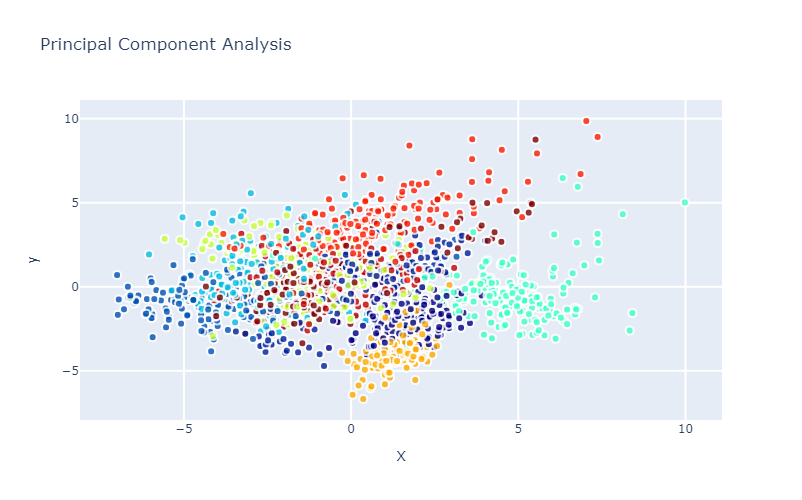

In [7]:
plot(X_reduced, y, "Principal Component Analysis")

As observed from the scatter plot, we can just about make out a few discernible clusters.
<br>
PCA is meant to be an unsupervised method and therefore not optimised for separating different class labels.

<b>ii.  Linear Discriminant Analysis (LDA) </b>- Supervised, linear method

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=2))

In [9]:
X_reduced = lda.fit_transform(X, y)

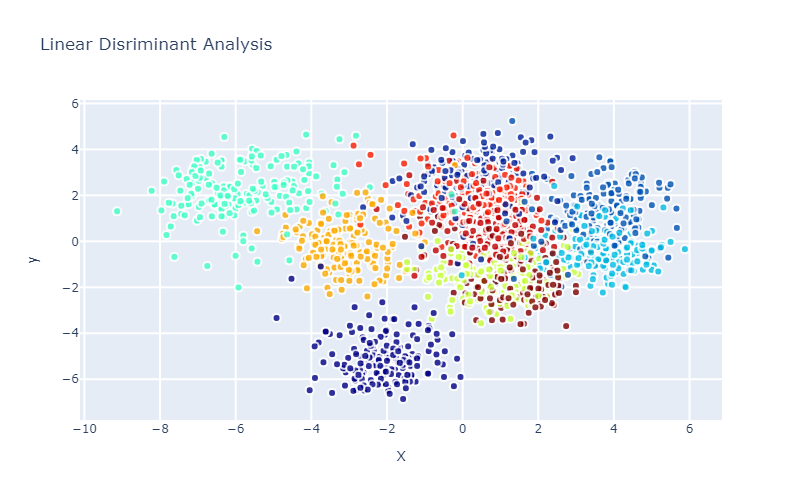

In [10]:
plot(X_reduced, y, "Linear Disriminant Analysis")

<b>iii. GaussianRandomProjection</b>- Unsupervised, <br>
In the random projection, data with a very large dimension (d) are projected in a two-dimensional space (kd) with a random matrix.

In [11]:
from sklearn.random_projection import GaussianRandomProjection

GRP = make_pipeline(StandardScaler(),
                    GaussianRandomProjection(n_components=2,
                                             eps = 0.5,
                                             random_state=RANDOM_STATE))

In [12]:
X_reduced = GRP.fit_transform(X)

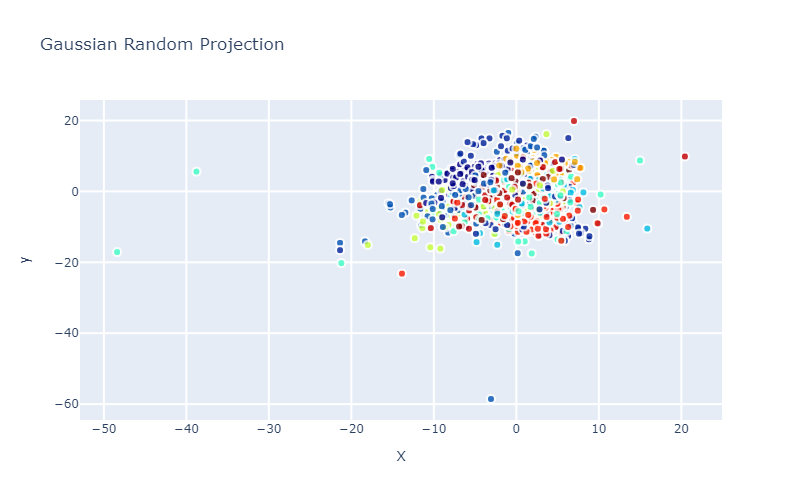

In [13]:
plot(X_reduced, y, "Gaussian Random Projection")

<b>  iv. Neighborhood Component Analysis (NCA)</b> - Supervised, linear method.<br>
It improves the classification accuracy of a stochastic nearest neighbors rule in the transformed space.

In [14]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis

nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=2,
                                                   random_state=RANDOM_STATE))

In [15]:
X_reduced = nca.fit_transform(X, y)

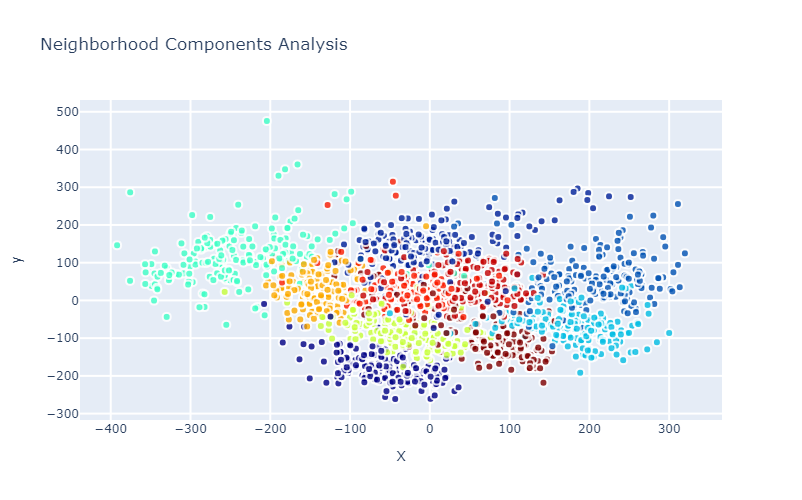

In [16]:
plot(X_reduced, y, "Neighborhood Components Analysis")

<b> v.  ISOMAP </b>- Unsupervised, nonlinear

In [17]:
from sklearn.manifold import Isomap

isomap = make_pipeline(StandardScaler(),
                       Isomap(n_components=2,
                              n_jobs = -1,
                              n_neighbors = 5))

In [18]:
X_reduced = isomap.fit_transform(X)

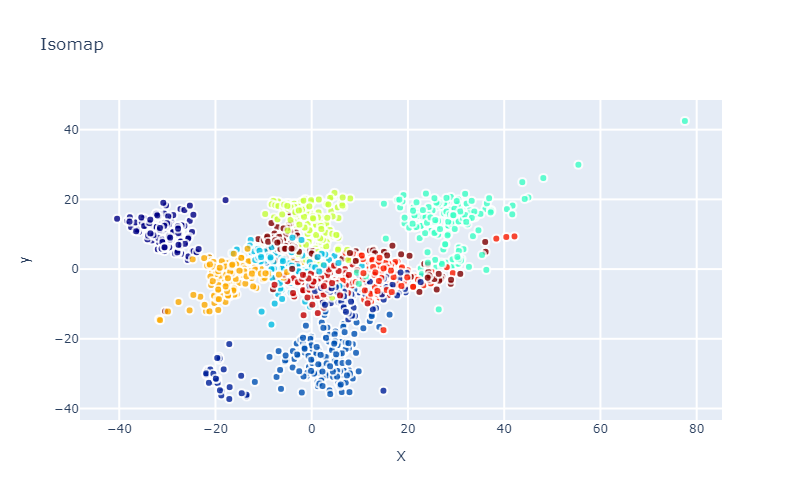

In [19]:
plot(X_reduced, y, "Isomap")

<b>vi. Independant Component Analysis</b> - Unsupervised, Linear

In [20]:
from sklearn.decomposition import FastICA

FastICA = make_pipeline(StandardScaler(),
                        FastICA(n_components=2,
                                algorithm = 'parallel',
                                whiten = True,
                                max_iter = 100,
                                random_state=RANDOM_STATE))

In [21]:
X_reduced = FastICA.fit_transform(X)

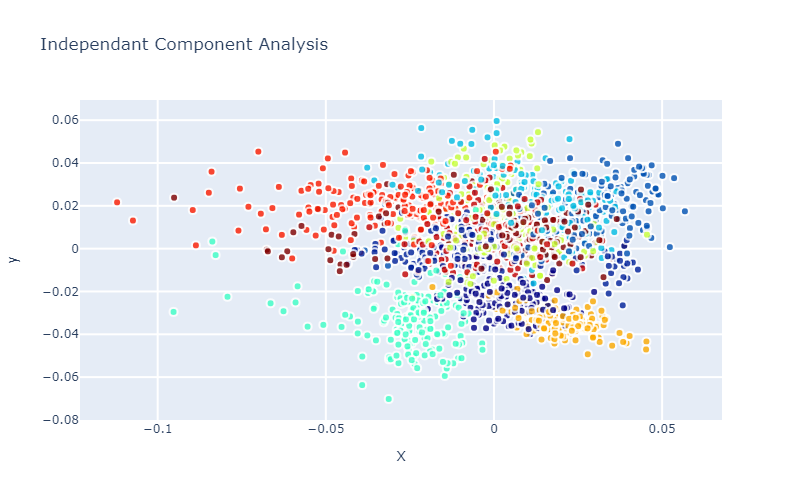

In [22]:
plot(X_reduced, y, "Independant Component Analysis")

<b>vii. TSNE </b>- Non-Linear, unsupervised

In [79]:
from sklearn.manifold import TSNE

tsne = make_pipeline(StandardScaler(),
                       TSNE(n_components=2))

In [68]:
X_reduced = tsne.fit_transform(X)

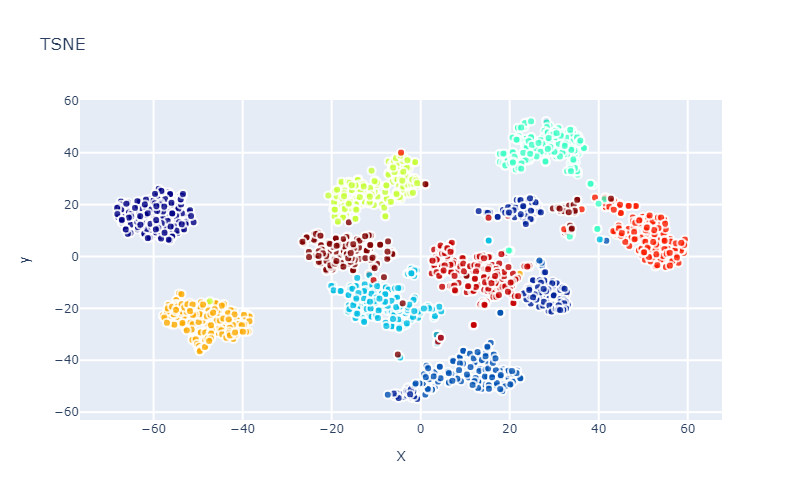

In [69]:
plot(X_reduced, y, "TSNE")

<b> vii. Locally Linear Embedding</b> - Unsupervised

LLE works by first measuring how each training instance linearly relates to its closest neighbors (c.n.), and then looking for a low-dimensional representation of the training set where these local relationships are best preserved (more details shortly). This makes it particularly good at unrolling twisted manifolds, especially when there is not too much noise.

In [26]:
from sklearn.manifold import LocallyLinearEmbedding

lle = make_pipeline(StandardScaler(),
                    LocallyLinearEmbedding(n_components=2,
                                           n_neighbors = 10,
                                           method = 'modified',
                                           n_jobs = 4,
                                           random_state=RANDOM_STATE))

In [27]:
X_reduced = lle.fit_transform(X)

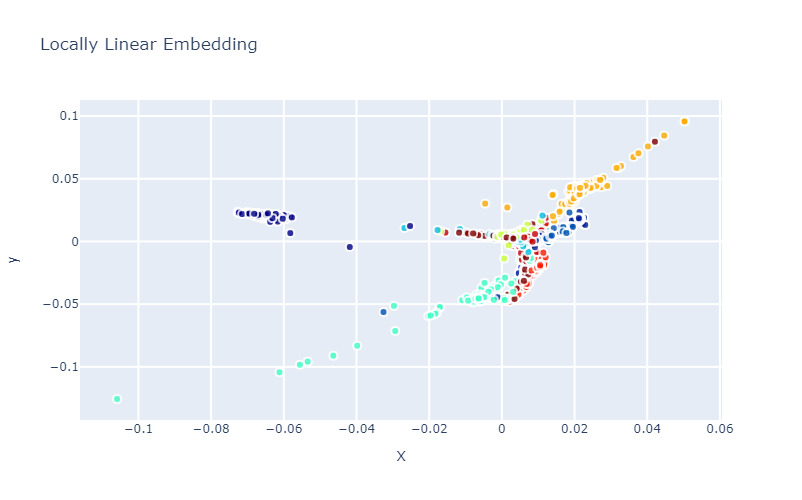

In [28]:
plot(X_reduced, y, "Locally Linear Embedding")

#### UMAP

In [83]:
!pip install -q umap-learn

In [84]:
import umap

ump = make_pipeline(StandardScaler(),
                    umap.UMAP(n_neighbors=5,
                              min_dist=0.3,
                              metric='correlation'))

In [86]:
X_reduced = ump.fit_transform(X)

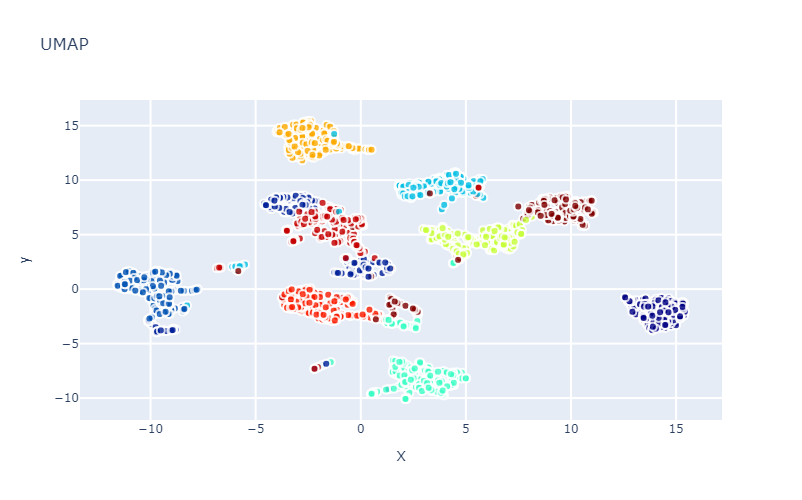

In [87]:
plot(X_reduced, y, "UMAP")

In [41]:
from sklearn.linear_model import LogisticRegression
import timeit

In [88]:
dim_reduction_methods = {'PCA': pca, 
                         'LDA': lda, 
                         'NCA': nca, 
                         'GRP' : GRP, 
                         'ISOMAP': isomap,
                         'ICA': FastICA, 
                         'LLE': lle,
                         'T-SNE': tsne,
                         'UMAP': ump}

def run_model():
    names, times, train_scores, test_scores = [], [], [], []
    
    for name, pipe in dim_reduction_methods.items():
        lr_model = LogisticRegression()
        
        start_time = timeit.default_timer()
        
        if name != 'T-SNE':
            pipe.fit(X_train, y_train)
        
            X_train_reduced = pipe.transform(X_train)
            X_test_reduced = pipe.transform(X_test)
        else:
            X_train_reduced = pipe.fit_transform(X_train, y_train)
            X_test_reduced = pipe.fit_transform(X_test, y_test)
        
        end_time = timeit.default_timer()
        lr_model.fit(X_train_reduced, y_train)
        
        train_acc = lr_model.score(X_train_reduced, y_train)
        test_acc = lr_model.score(X_test_reduced, y_test)
        
        names.append(name)
        times.append(np.round(end_time-start_time, decimals=3))
        train_scores.append(train_acc)
        test_scores.append(test_acc)
    
    data = {"Technique": names,
                "Time Taken": times,
                "Train Score": train_scores,
                "Test Score": test_scores
           }
    score_df = pd.DataFrame(data)
    
    return score_df

In [89]:
result_df = run_model()

In [90]:
result_df

,Technique,Time Taken,Train Score,Test Score
0,PCA,0.184,0.531180,0.540601
1,LDA,0.090,0.687082,0.648498
2,NCA,3.232,0.779510,0.753059
3,GRP,0.003,0.306236,0.305895
4,ISOMAP,0.786,0.719376,0.719689
5,ICA,0.060,0.403118,0.400445
6,LLE,0.639,0.226058,0.225806
7,T-SNE,14.947,0.869710,0.006674
8,UMAP,10.825,0.992205,0.952169
